In [ ]:
# Them vao cac thu vien
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
print('import done!')

import done!


<h1><font color = '#339966'>1.Input Data<font></h1>

In [ ]:
# Import data da cleanclean
df = pd.read_csv('/content/file_Walmart_sale_final.csv')
df.head(10)

,Column1,Store,N Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,1,2/5/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1,2/12/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,2,1,2/19/2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,3,1,2/26/2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,4,1,3/5/2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,5,1,3/12/2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,6,1,3/19/2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,7,1,3/26/2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,8,1,4/2/2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,9,1,4/9/2010,1545418.53,0,65.86,2.770,210.622857,7.808


<h1><font color = '#339966'>2.Meta Data<font></h1>

In [ ]:
# Thong tin chung
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Column1       6435 non-null   int64  
 1   Store         6435 non-null   int64  
 2   N Date        6435 non-null   object 
 3   Weekly_Sales  6435 non-null   float64
 4   Holiday_Flag  6435 non-null   int64  
 5   Temperature   6435 non-null   float64
 6   Fuel_Price    6435 non-null   float64
 7   CPI           6435 non-null   float64
 8   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 452.6+ KB


In [6]:
# Cac cot trong df
df.columns

Index(['Column1', 'Store', 'N Date', 'Weekly_Sales', 'Holiday_Flag',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
# Gia tri trong cac cot category
print(df['Store'].unique())
print(df['Store'].nunique())
print("*********")
print(df['Holiday_Flag'].unique())
print(df['Holiday_Flag'].nunique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
45
*********
[0 1]
2


<h1><font color = '#339966'>3.Data Wrangling<font></h1>

In [8]:
# Check missing value
missing_values = df.isnull().sum()
print(f'Missing values: \n {missing_values}')
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f'Duplicate rows: {duplicate_rows}')

Missing values: 
 Column1         0
Store           0
N Date          0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Duplicate rows: 0


In [9]:
# Recheck for duplicate rows
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
duplicate_count = duplicate_rows.shape[0]
print(f'Number of duplicate rows: {duplicate_count}')
print(duplicate_rows.head())

Number of duplicate rows: 0
Empty DataFrame
Columns: [Column1, Store, N Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []


In [10]:
# Recheck du lieu bi missing
df.isnull().values.any()

False

In [11]:
# Doi kieu data type voi cot Store and Holiday Flag
df[["Store", "Holiday_Flag"]] = df[["Store", "Holiday_Flag"]].astype('category')
df['N Date'] = pd.to_datetime(df['N Date'])
df.dtypes

,0
Column1,int64
Store,category
N Date,datetime64[ns]
Weekly_Sales,float64
Holiday_Flag,category
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


In [12]:
# Rename colum
df = df.rename(columns={'Column1':'Index num'})
df.head(20)

,Index num,Store,N Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
6,6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808
9,9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808


<h1><font color = '#339966'>4.EDA: Exploratory Data Analysis<font></h1>

In [13]:
# Thong ke co ban
df.describe()

,Index num,N Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,3217.000000,2011-06-17 00:00:00,1.046965e+06,60.663782,3.358607,171.578394,7.999151
min,0.000000,2010-02-05 00:00:00,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,1608.500000,2010-10-08 00:00:00,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,3217.000000,2011-06-17 00:00:00,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,4825.500000,2012-02-24 00:00:00,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,6434.000000,2012-10-26 00:00:00,3.818686e+06,100.140000,4.468000,227.232807,14.313000
std,1857.768823,NaN,5.643666e+05,18.444933,0.459020,39.356712,1.875885


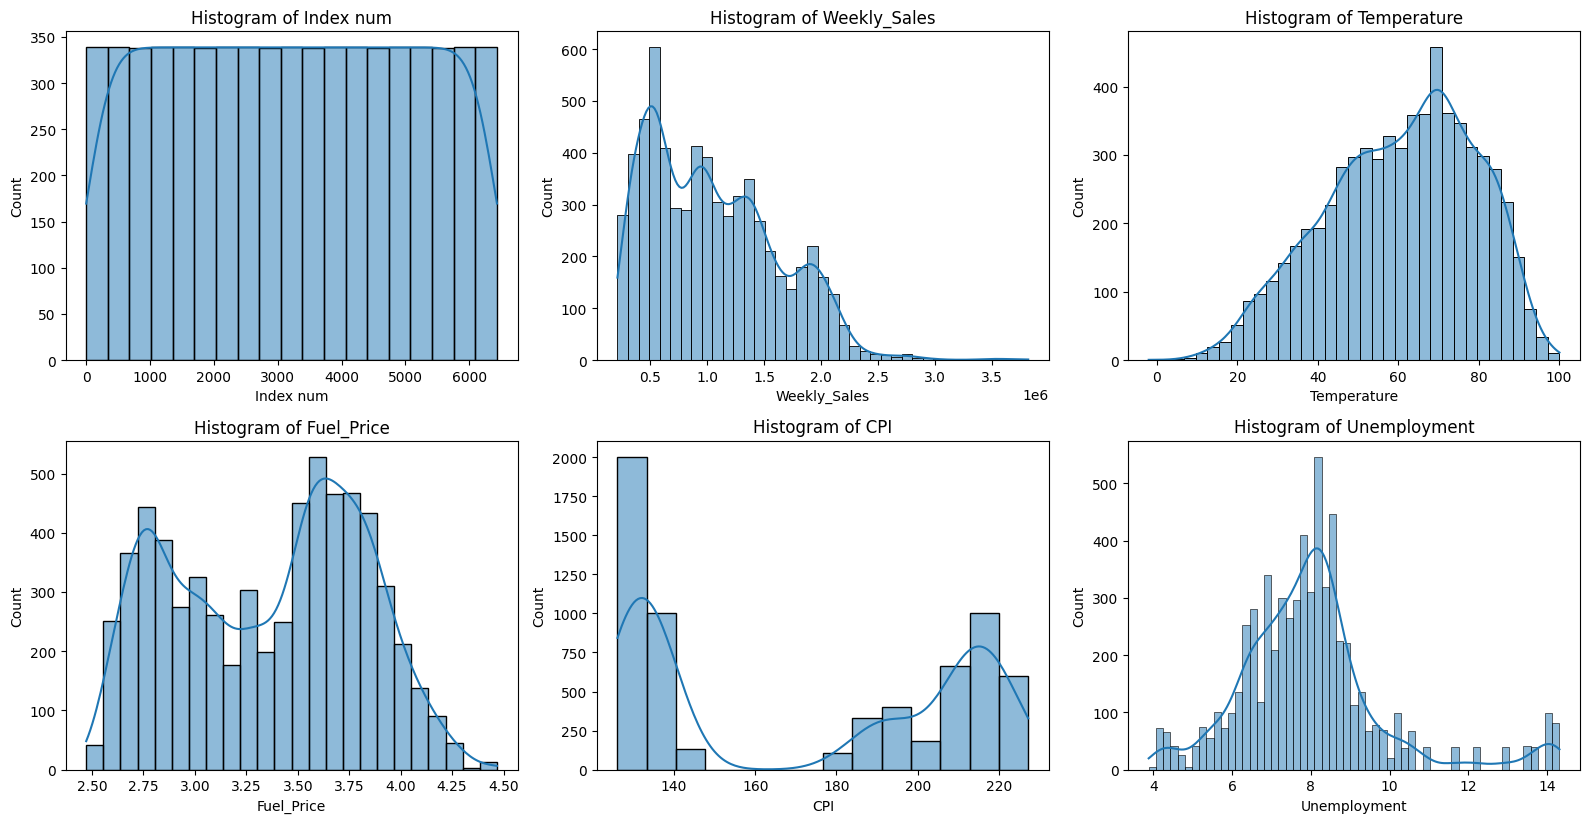

In [ ]:
# Visualize Histogram 
# Tan suat xuat hien cua cac gia tri trong cot
numerical_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(16, 12)) 
for i, col in enumerate(numerical_columns, 1): 
    plt.subplot(3, 3, i) 
    sns.histplot(df[col], kde=True) 
    plt.title(f'Histogram of {col}')
plt.tight_layout() 
plt.show() 

# Cac Histogram ve Weekly Sales, Temperature, Fuel_Price, CPI, Unemployment_Rate co nhieu yeu to de phan tich
# Histogram ve Index num khong co y nghia phan tich

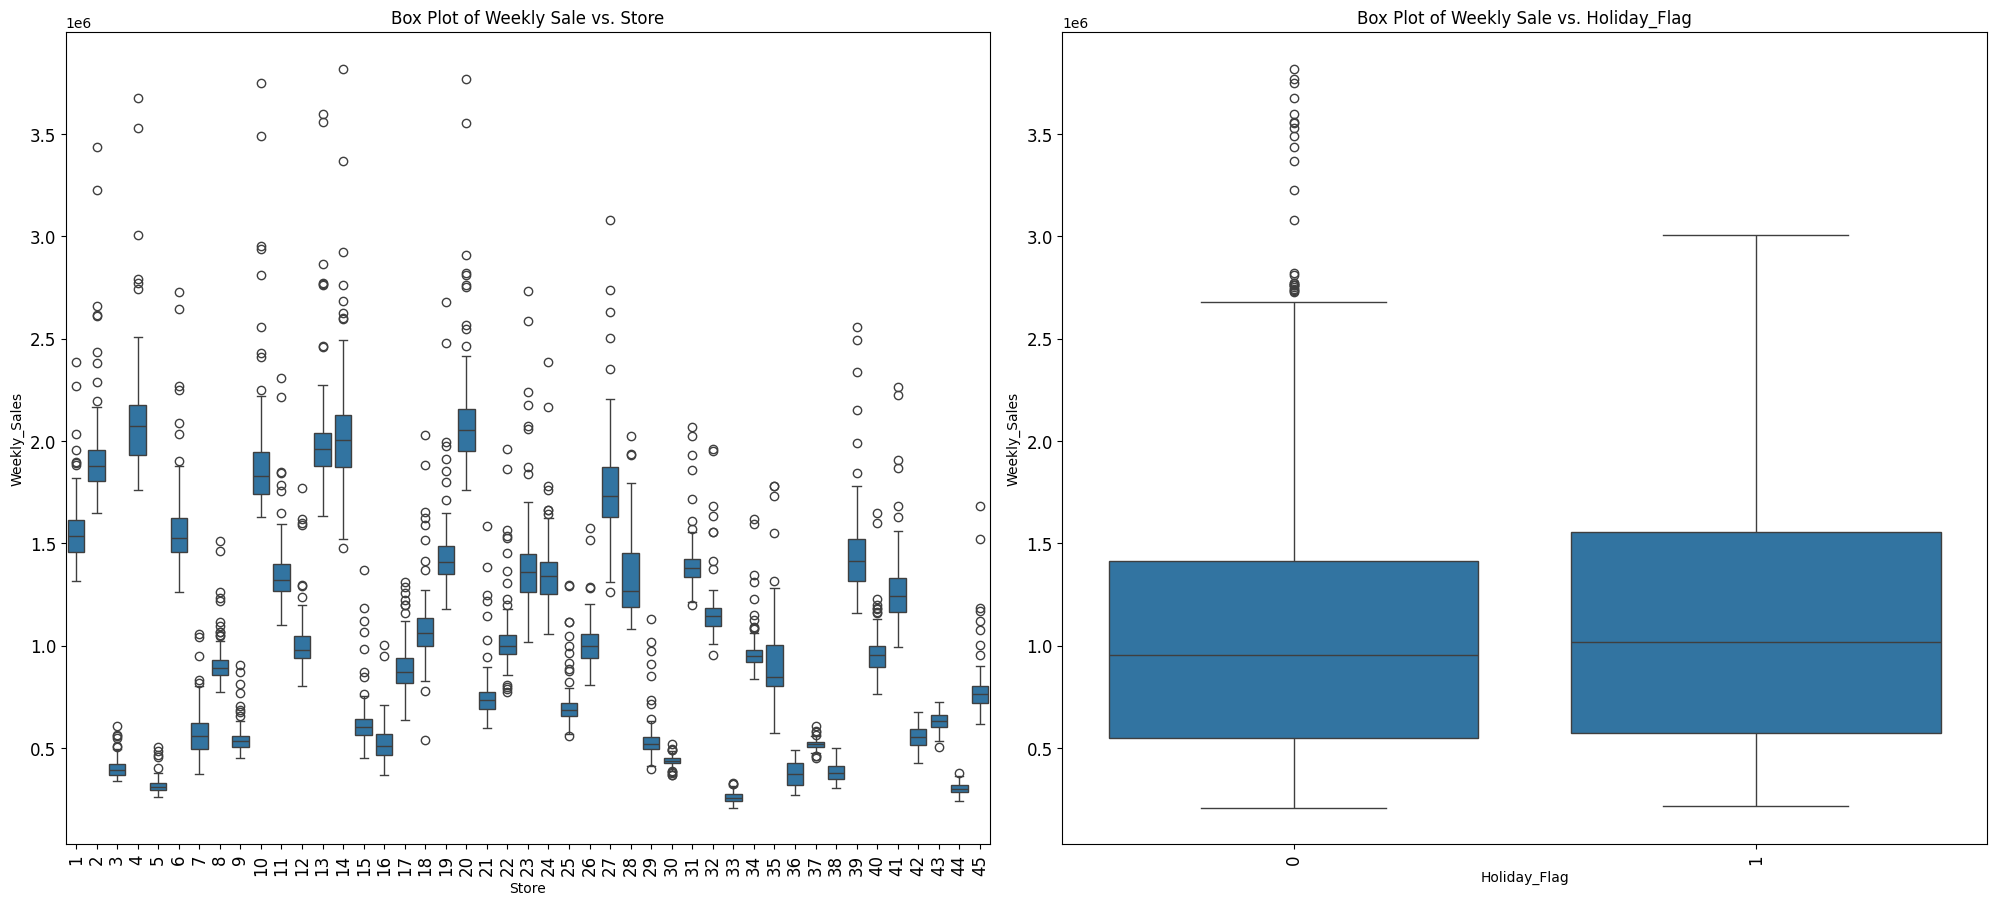

In [ ]:
# Visualize Box plotplot
categorical_columns = df.select_dtypes(include=['category']).columns

plt.figure(figsize=(40, 35)) 
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=col, y='Weekly_Sales', data=df) 
    plt.title(f'Box Plot of Weekly Sale vs. {col}')
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



<h1><font color = '#3366FF'>Doanh thu theo tuan cua tung cua hang co su phan hoa va co nhieu gia tri ngoai le<font></h1>
<h1><font color = '#3366FF'>Doanh so cua tuan co ngay le lon hon tuan khong co ngay le va khong co gia tri ngoai le<font></h1>


<h1><font color = '#339966'>Tim hieu cac yeu to anh huong Weekly Sales<font></h1>

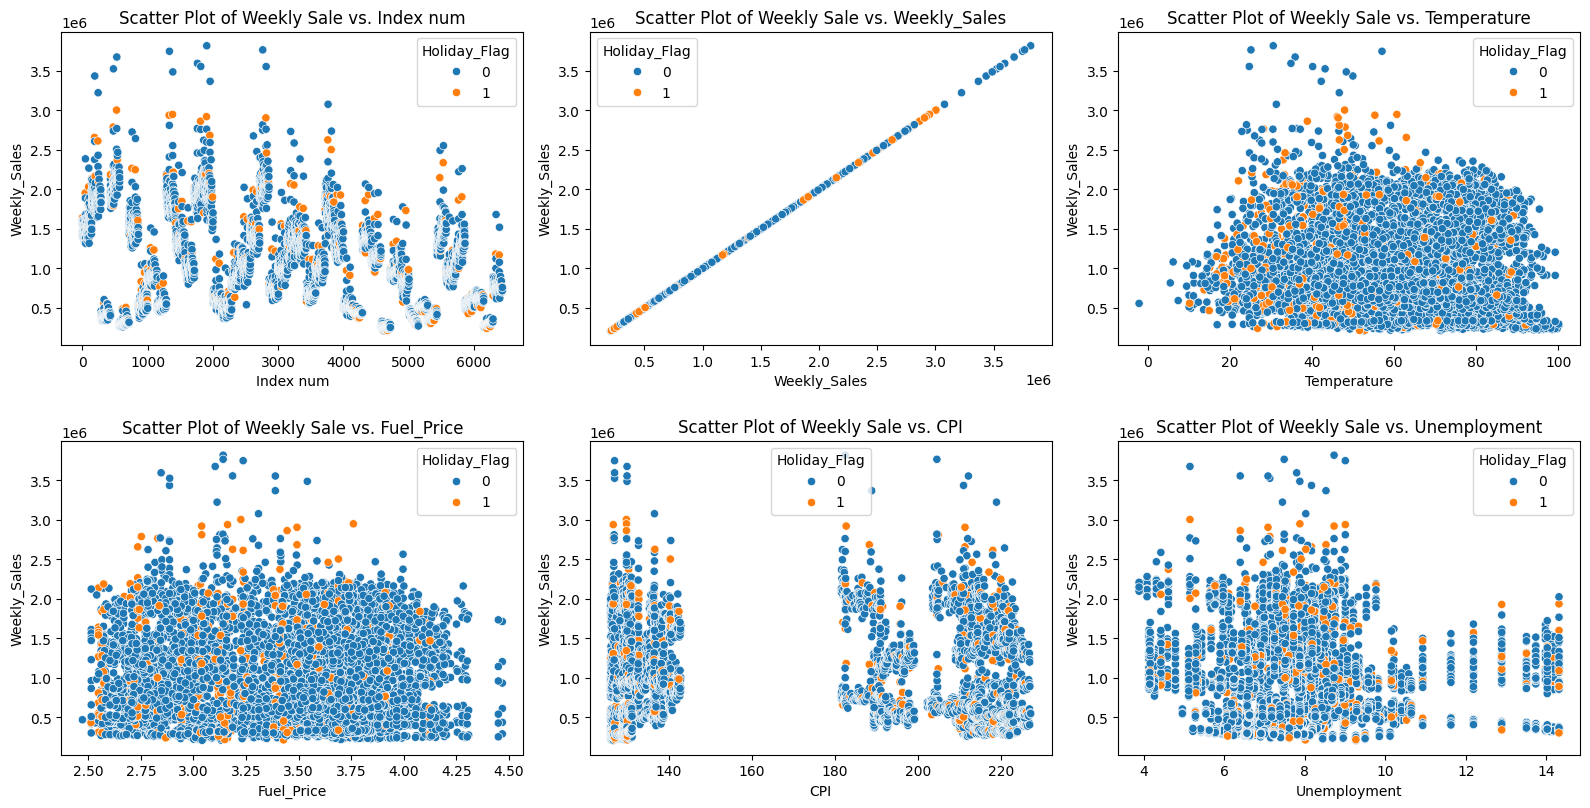

In [ ]:
# Visualize Scatter plot
# numerical_columns da duoc khoi tao trong cau lenh truoc dodo(cot co kieu du lieu la number)
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=col, y='Weekly_Sales',hue=df['Holiday_Flag'], data=df)
    plt.title(f'Scatter Plot of Weekly Sale vs. {col}')
plt.tight_layout()
plt.show()


<h1><font color = '#3366FF'> Ngoai tru Index num(cot so thu tu), cot Weekly_Sales(chinh no) thi cac yeu to khac co tuong quan phan tan voi Weekly_Sales
<font></h1>


<ipython-input-17-80c031e309c3>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Weekly_Sales', data=df, ci=None) # Ve bieu do cot, tat cac thanh bao loi
<ipython-input-17-80c031e309c3>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Weekly_Sales', data=df, ci=None) # Ve bieu do cot, tat cac thanh bao loi


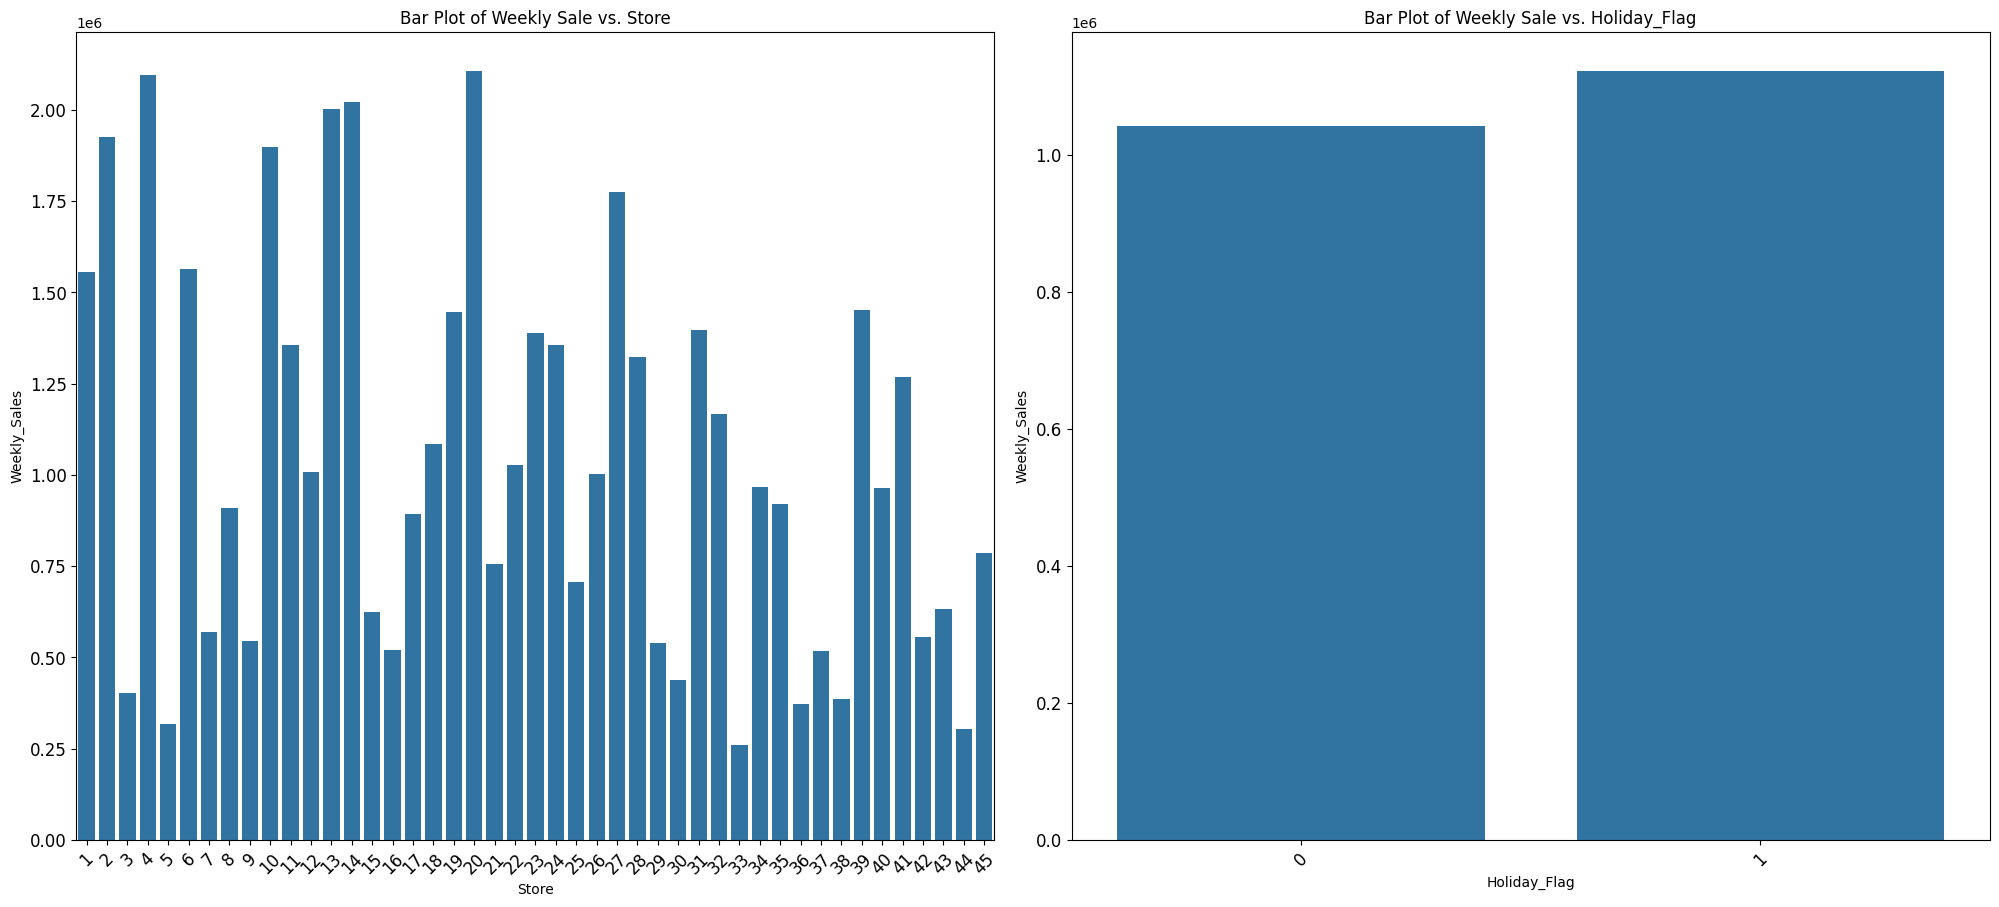

In [ ]:
# Viasualize Bar plotplot 
plt.figure(figsize=(40, 35)) 
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.barplot(x=col, y='Weekly_Sales', data=df, ci=None) 
    plt.title(f'Bar Plot of Weekly Sale vs. {col}')
    plt.xticks(rotation=45,fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<h5><font color = '#7ED7C1'>Tham chieu
<font></h5>
<h5><font color = '#7ED7C1'>Khong co dau bieu thi tuong quan duong
<font></h5><h5><font color = '#7ED7C1'>Co dau "-" bieu thi tuong quan am
<font></h5>

- |r| từ 0.0 đến 0.1: Tương quan rất yếu hoặc không có tương quan.
- |r| từ 0.1 đến 0.3: Tương quan yếu.
- |r| từ 0.3 đến 0.5: Tương quan trung bình.
- |r| từ 0.5 đến 0.7: Tương quan mạnh.
- |r| từ 0.7 đến 1.0: Tương quan rất mạnh.

In [ ]:
# Kiem tra tuong quan
numerical_df = df.select_dtypes(include=['number']) 
df_corr = numerical_df.corr()
df_corr



,Index num,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Index num,1.000000,-0.335095,-0.019423,0.077151,-0.207726,0.217961
Weekly_Sales,-0.335095,1.000000,-0.063810,0.009464,-0.072634,-0.106176
Temperature,-0.019423,-0.063810,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.077151,0.009464,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.207726,-0.072634,0.176888,-0.170642,1.000000,-0.302020
Unemployment,0.217961,-0.106176,0.101158,-0.034684,-0.302020,1.000000


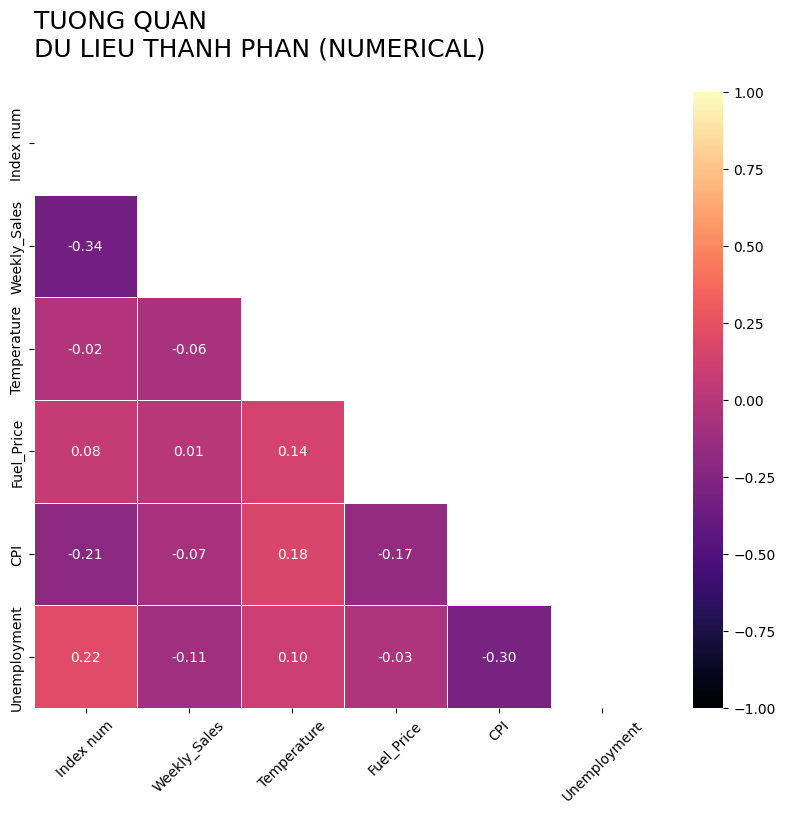

In [ ]:
# Heatmap bieu hien tuong quan
matrix = np.triu(df_corr)
figure, axis = plt.subplots(figsize=(10,8))

axis.set_xticklabels('', rotation=45)
cmap = sns.color_palette("magma", as_cmap=True)
sns.heatmap(df_corr,mask = matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
title = 'TUONG QUAN\nDU LIEU THANH PHAN (NUMERICAL)\n'
axis.set_title(title, loc='left',fontsize=18)
plt.show()



<h1><font color = '#3366FF'>Weekly Sales co tuong quan nghich rat yeu voi Unemployment<font></h1>
<h1><font color = '#3366FF'>Temperature co tuong quan thuan rat yeu voi Fuel Price, CPI, Unemployment<font></h1>
<h1><font color = '#3366FF'>Fuel Price co tuong quan nghich rat yeu voi CPI<font></h1>
<h1><font color = '#3366FF'>CPI co tuong quan nghich yeu voi Unemployment<font></h1>
<h1><font color = '#3366FF'>Chi so Temperature cung tuong quan yeu voi cac chi so con lai<font></h1>
<h1><font color = '#3366FF'>->Co the cac yeu to nay can thoi gian de the hien tac dong<font></h1>

<h1><font color = '#339966'>Phan tich theo cac yeu to gia dinh<font></h1>

In [20]:
df.head(10)

,Index num,Store,N Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
6,6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808
9,9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808


In [ ]:
# Su dung ham de tach cot N Date thanh cot Month of Year
df['Month_of_Year'] = pd.to_datetime(df['N Date']).dt.to_period('M')
df['Day'] = df['N Date'].dt.day
df['Month'] = df['N Date'].dt.month
df['Year'] = df['N Date'].dt.year
df = df.drop(columns=['Day'])
df.head()

,Index num,Store,N Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_of_Year,Month,Year
0,0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02,2,2010
1,1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02,2,2010
2,2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02,2,2010
3,3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02,2,2010
4,4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03,3,2010


<h1><font color = '#339966'>a.Phan tich theo tinh trung binh theo tuan cua cac chi so<font></h1>


In [22]:
df_correlation = df.groupby('Month_of_Year').agg({'CPI':'mean','Unemployment':'mean','Weekly_Sales':'mean','Fuel_Price':'mean','Temperature':'mean'}).reset_index()
df_Month = df_correlation['Month_of_Year'].unique()
df_correlation

,Month_of_Year,CPI,Unemployment,Weekly_Sales,Fuel_Price,Temperature
0,2010-02,167.834459,8.619311,1.057405e+06,2.691967,36.288000
1,2010-03,167.930846,8.619311,1.010666e+06,2.786706,47.194389
2,2010-04,167.678437,8.497711,1.028499e+06,2.868538,56.901378
3,2010-05,167.641758,8.497711,1.037283e+06,2.917350,65.364389
4,2010-06,168.004688,8.497711,1.068034e+06,2.788006,75.076556
5,2010-07,168.001633,8.428578,1.033689e+06,2.773996,79.347511
6,2010-08,168.211886,8.428578,1.042445e+06,2.783000,78.919722
7,2010-09,168.255024,8.428578,9.848216e+05,2.734517,72.801333
8,2010-10,168.453666,8.475289,9.651637e+05,2.807280,62.161911
9,2010-11,168.601460,8.475289,1.126963e+06,2.886272,49.778667


In [ ]:

df_corre = df_correlation[['CPI','Unemployment','Fuel_Price','Temperature','Weekly_Sales']].corr()
df_corre

,CPI,Unemployment,Fuel_Price,Temperature,Weekly_Sales
CPI,1.000000,-0.978423,0.829920,0.160691,0.039073
Unemployment,-0.978423,1.000000,-0.752694,-0.168876,0.008050
Fuel_Price,0.829920,-0.752694,1.000000,0.209530,-0.072015
Temperature,0.160691,-0.168876,0.209530,1.000000,-0.196476
Weekly_Sales,0.039073,0.008050,-0.072015,-0.196476,1.000000


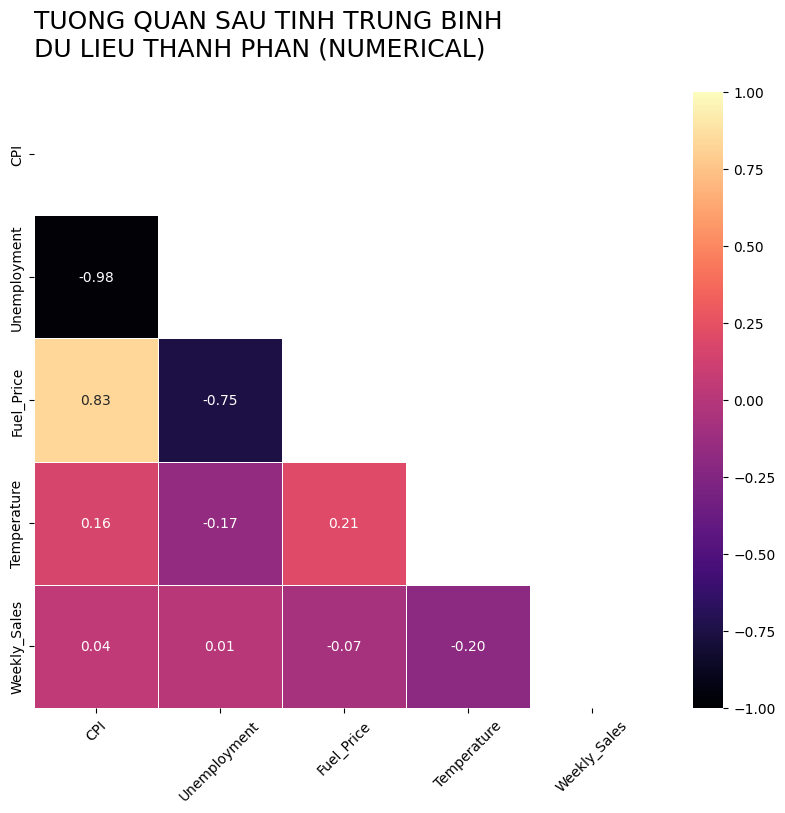

In [ ]:
matrix_corr = np.triu(df_corre)
figure, axis = plt.subplots(figsize=(10,8))

axis.set_xticklabels('', rotation=45)
cmap = sns.color_palette("magma", as_cmap=True)
sns.heatmap(df_corre, mask=matrix_corr, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
title = 'TUONG QUAN SAU TINH TRUNG BINH\nDU LIEU THANH PHAN (NUMERICAL)\n'
axis.set_title(title, loc='left',fontsize=18)
plt.show()

<h1><font color = '#3366FF'>Sau khi tinh trung binh tuan theo tung thang:<font></h1>
<h1><font color = '#3366FF'>Chi so Weekly_Sales tuong quan rat yeu voi hau het cac chi so, rieng co Temperature thi tuong quan nghich yeu<font></h1>
<h1><font color = '#3366FF'>Chi so CPI tuong quan thuan rat manh voi chi so Fuel_Price va nguoc lai rat manh voi chi so Unemployment<font></h1>
<h1><font color = '#3366FF'>Dan den chi so Fuel_Price cung tuong quan nghich rat manh voi chi so Unemployment<font></h1>
<h1><font color = '#3366FF'>Chi so Temperature cung tuong quan yeu voi cac chi so con lai<font></h1>


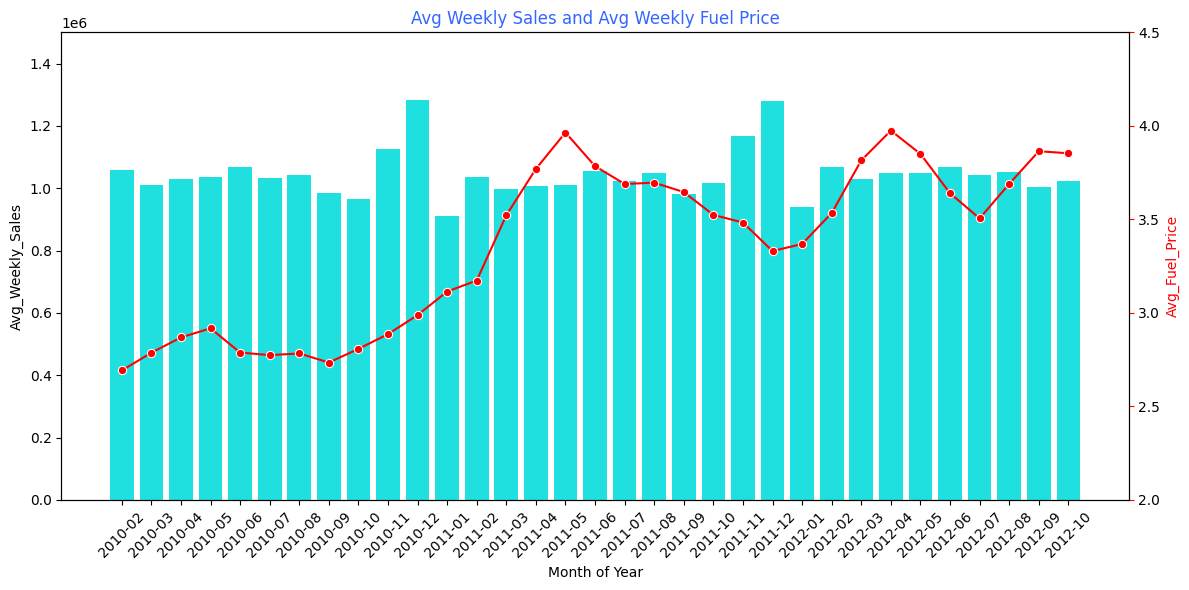

In [ ]:

# Ve bieu do duong voi truc x là trung binh gia nhien lieu, truc y la trung binh doanh so
figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_Month))
plt.xticks(x_axis, df_Month, rotation = 45)

sns.barplot(x=x_axis, y='Weekly_Sales', data=df_correlation, color='#00FFFF', ax = axis)
ax2 = axis.twinx() 
sns.lineplot(x=x_axis, y='Fuel_Price', data=df_correlation, marker='o', color='red', ax = ax2)

axis.set_ylim(0, 1.5*1e6)
ax2.set_ylim(2.0, 4.5)

axis.set_xlabel("Month of Year")
axis.set_ylabel("Avg_Weekly_Sales")
plt.title("Avg Weekly Sales and Avg Weekly Fuel Price",color="#3366FF")

ax2.tick_params('y', color='r')
ax2.set_ylabel('Avg_Fuel_Price', color='r')
plt.tight_layout()
plt.show()


<h1><font color = '#3366FF'>Chi so trung binh theo tuan Fuel_Price co xu huong giam theo thoi gian<font></h1>
<h1><font color = '#3366FF'>Chi so trung binh theo tuan Weekly_Sales khong co anh huong boi Fuel_Price trung binh va kha tuong dong qua cac nam<font></h1>

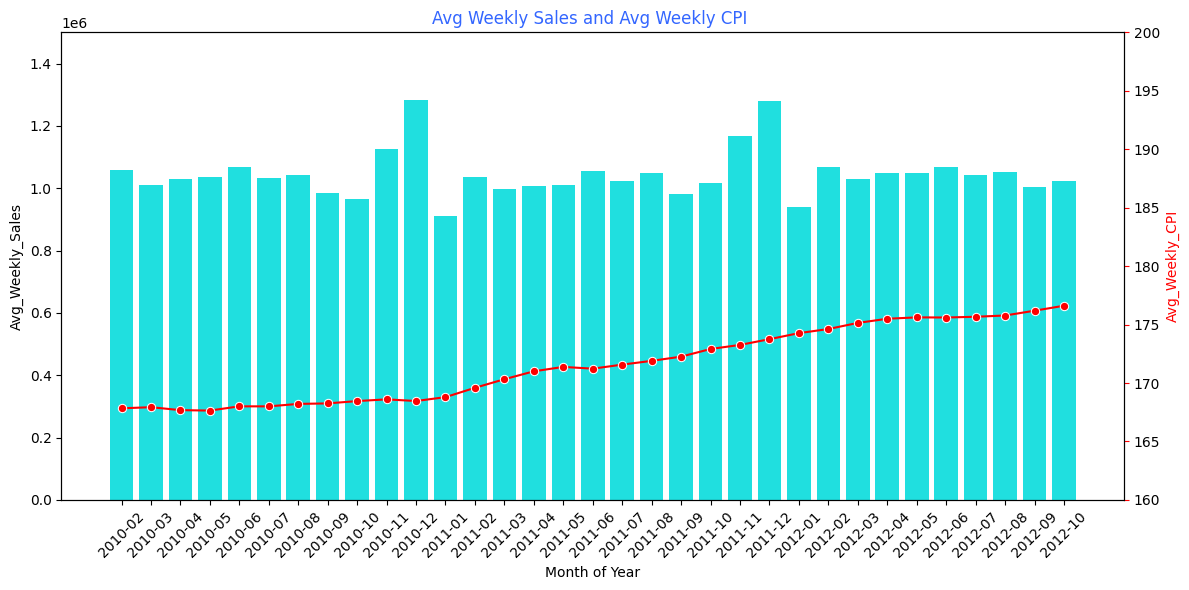

In [ ]:

figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_Month))

plt.xticks(x_axis, df_Month, rotation = 45)
sns.barplot(x=x_axis, y='Weekly_Sales', data=df_correlation, color='#00FFFF', ax = axis)
ax2 = plt.twinx() 
sns.lineplot(x=x_axis, y='CPI', data=df_correlation, marker='o', color='red', ax = ax2)

axis.set_ylim(0, 1.5*1e6)
ax2.set_ylim(160,200)

axis.set_xlabel("Month of Year")
axis.set_ylabel("Avg_Weekly_Sales")
plt.title("Avg Weekly Sales and Avg Weekly CPI ",color="#3366FF")

ax2.tick_params('y', color='r')
ax2.set_ylabel('Avg_Weekly_CPI', color='r')
plt.tight_layout()
plt.show()

<h1><font color = '#3366FF'>Chi so trung binh theo tuan CPI co xu huong tăng theo thoi gian<font></h1>
<h1><font color = '#3366FF'>Chi so trung binh theo tuan Weekly_Sales voi CPI cung khong co anh huong nhieu<font></h1>


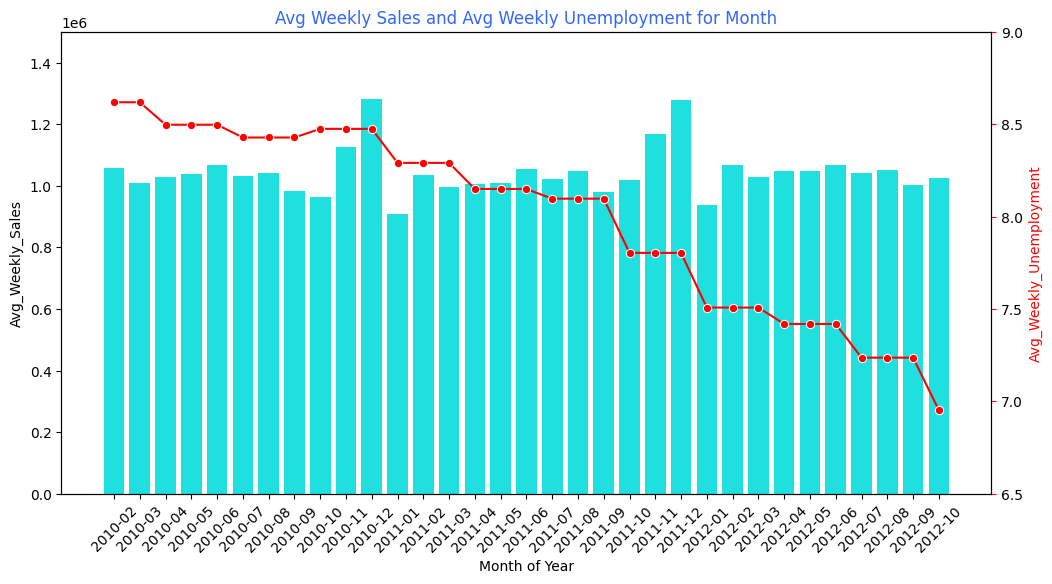

In [ ]:

figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_Month))

plt.xticks(x_axis, df_Month, rotation = 45)
sns.barplot(x=x_axis, y='Weekly_Sales', data=df_correlation, color='#00FFFF', ax = axis)
ax2 = axis.twinx() 
sns.lineplot(x=x_axis, y='Unemployment', data=df_correlation, marker='o', color='red', ax = ax2)

axis.set_ylim(0, 1.5*1e6)
ax2.set_ylim(6.5, 9)

axis.set_xlabel("Month of Year")
axis.set_ylabel("Avg_Weekly_Sales")
plt.title("Avg Weekly Sales and Avg Weekly Unemployment for Month",color="#3366FF")

ax2.tick_params('y', color='r')
ax2.set_ylabel('Avg_Weekly_Unemployment', color='r')
plt.show()

<h1><font color = '#3366FF'>Chi so Unemployment trung binh giam theo thơi gian<font></h1>
<h1><font color = '#3366FF'>Doanh thu trung binh tuan theo thang va chi so Unemployment trung binh khong co nhieu tuong quan<font></h1>


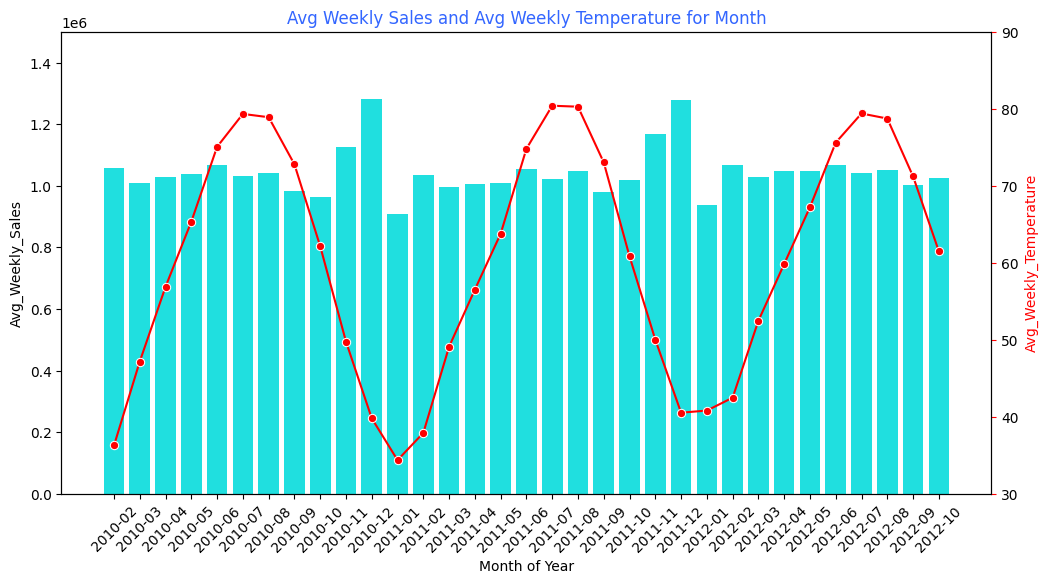

In [ ]:

figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_Month))

plt.xticks(x_axis, df_Month, rotation = 45)
sns.barplot(data=df_correlation, x=x_axis, y='Weekly_Sales', color='#00FFFF', ax = axis)
ax2 = axis.twinx() 
sns.lineplot(data=df_correlation, x=x_axis, y='Temperature', marker='o', color='red', ax = ax2)

axis.set_ylim(0, 1.5*1e6)
ax2.set_ylim(30, 90)

axis.set_xlabel("Month of Year")
axis.set_ylabel("Avg_Weekly_Sales")
plt.title("Avg Weekly Sales and Avg Weekly Temperature for Month",color="#3366FF")

ax2.tick_params('y', color='r')
ax2.set_ylabel('Avg_Weekly_Temperature', color='r')
plt.show()

<h1><font color = '#3366FF'>Chi so trung binh theo tuan Temperature co tinh chu ky <font></h1>

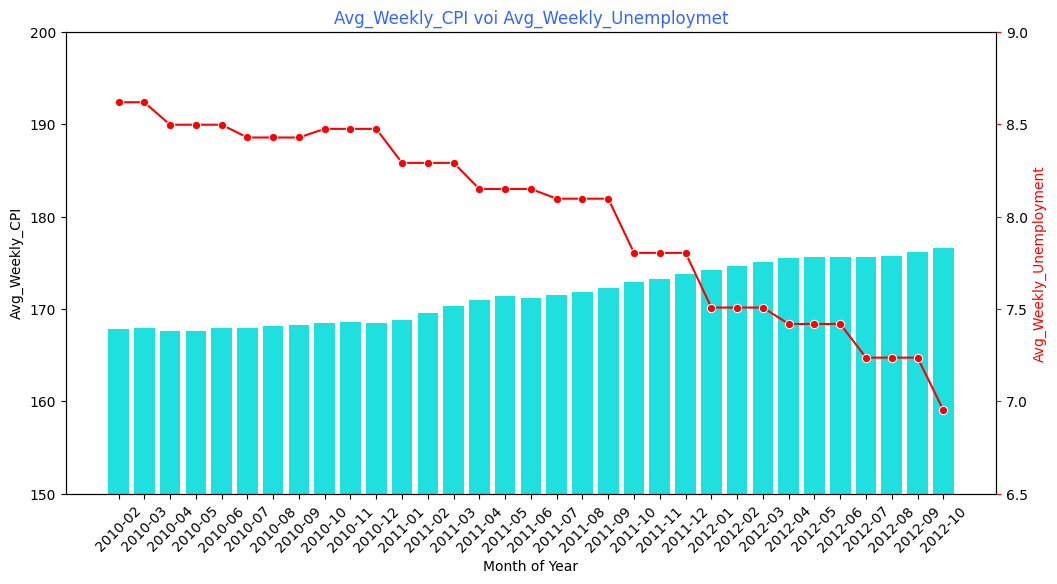

In [ ]:

figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_Month))

plt.xticks(x_axis, df_Month, rotation = 45)
sns.barplot(data=df_correlation, x=x_axis, y='CPI', color='#00FFFF', ax = axis)
ax2 = axis.twinx() 
sns.lineplot(data=df_correlation, x=x_axis, y='Unemployment', marker='o', color='red', ax = ax2)

axis.set_ylim(150, 200)
ax2.set_ylim(6.5, 9.0)

axis.set_xlabel("Month of Year")
axis.set_ylabel("Avg_Weekly_CPI")
plt.title("Avg_Weekly_CPI voi Avg_Weekly_Unemploymet",color="#3366FF")

ax2.tick_params('y', color='r')
ax2.set_ylabel('Avg_Weekly_Unemployment', color='r')
plt.show()

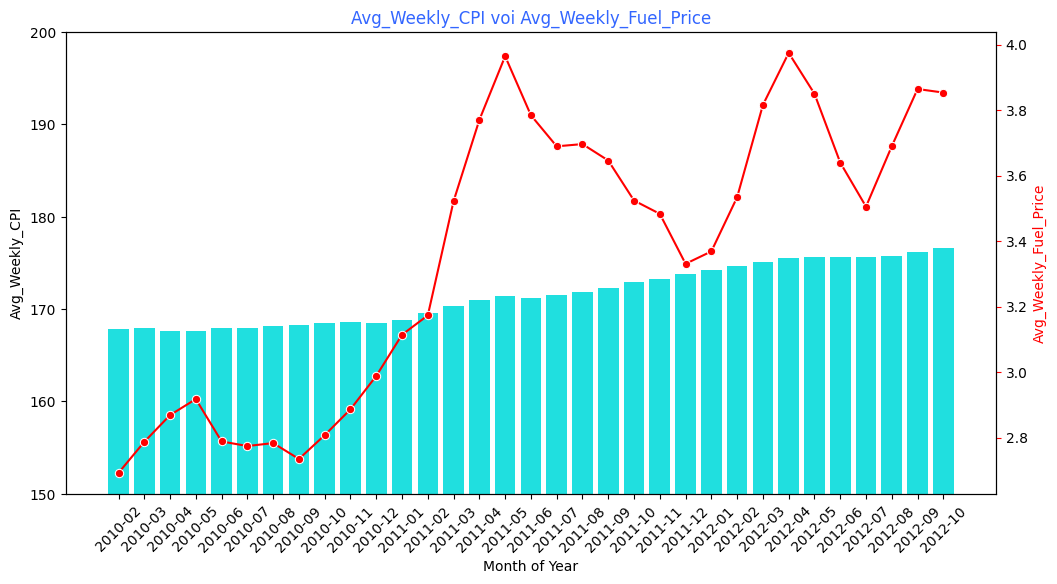

In [ ]:

figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_Month))

plt.xticks(x_axis, df_Month, rotation = 45)
sns.barplot(data=df_correlation, x=x_axis, y='CPI', color='#00FFFF', ax = axis)
ax2 = axis.twinx() 
sns.lineplot(data=df_correlation, x=x_axis, y='Fuel_Price', marker='o', color='red', ax = ax2)

axis.set_ylim(150, 200)
axis.set_xlabel("Month of Year")
axis.set_ylabel("Avg_Weekly_CPI")
plt.title("Avg_Weekly_CPI voi Avg_Weekly_Fuel_Price",color="#3366FF")

ax2.tick_params('y', color='r')
ax2.set_ylabel('Avg_Weekly_Fuel_Price', color='r')

plt.show()

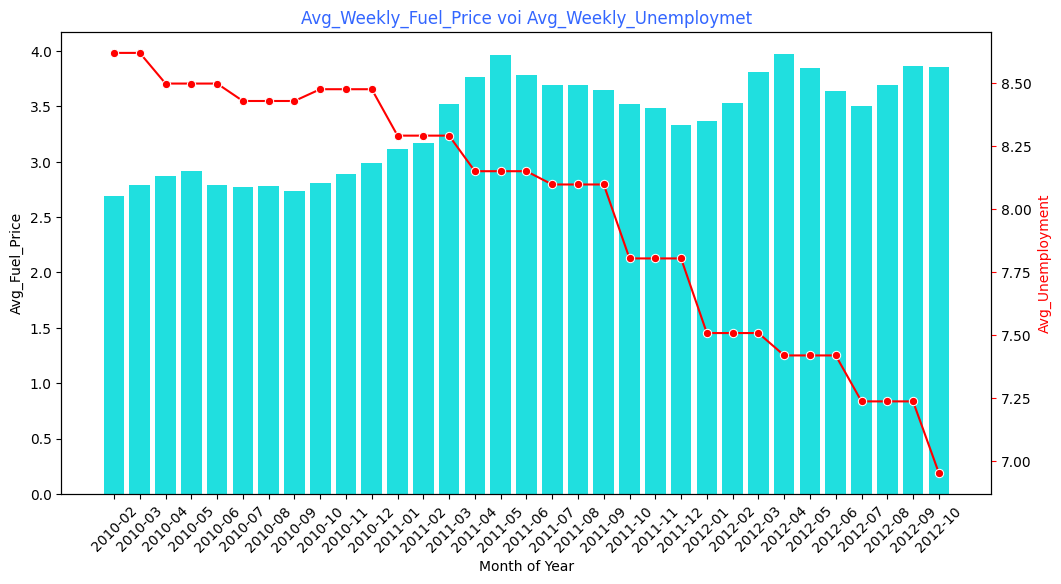

In [ ]:

figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_Month))

plt.xticks(x_axis, df_Month, rotation = 45)
sns.barplot(data=df_correlation, x=x_axis, y='Fuel_Price', color='#00FFFF', ax = axis)
ax2 = axis.twinx() 
sns.lineplot(data=df_correlation, x=x_axis, y='Unemployment', marker='o', color='red', ax = ax2)

axis.set_xlabel("Month of Year")
axis.set_ylabel("Avg_Fuel_Price")
plt.title("Avg_Weekly_Fuel_Price voi Avg_Weekly_Unemploymet",color="#3366FF")

ax2.tick_params('y', color='r')
ax2.set_ylabel('Avg_Unemployment', color='r')

plt.show()

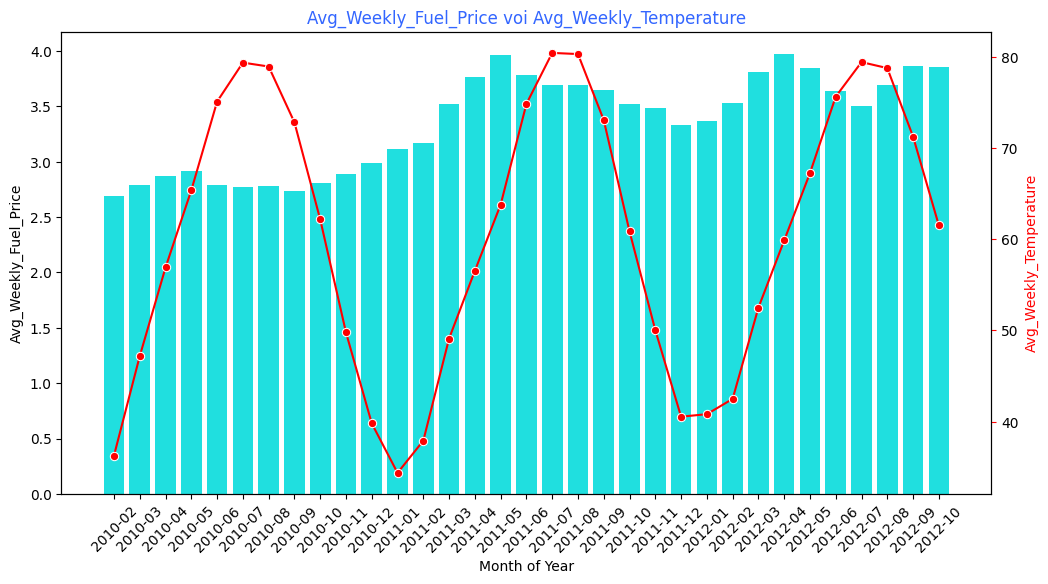

In [ ]:
figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_Month))

plt.xticks(x_axis, df_Month, rotation = 45)
sns.barplot(data=df_correlation, x=x_axis, y='Fuel_Price', color='#00FFFF', ax = axis)
ax2 = axis.twinx() 
sns.lineplot(data=df_correlation, x=x_axis, y='Temperature', marker='o', color='red', ax = ax2)

axis.set_xlabel("Month of Year")
axis.set_ylabel("Avg_Weekly_Fuel_Price")
plt.title("Avg_Weekly_Fuel_Price voi Avg_Weekly_Temperature",color="#3366FF")

ax2.tick_params('y', color='r')
ax2.set_ylabel('Avg_Weekly_Temperature', color='r')
plt.show()

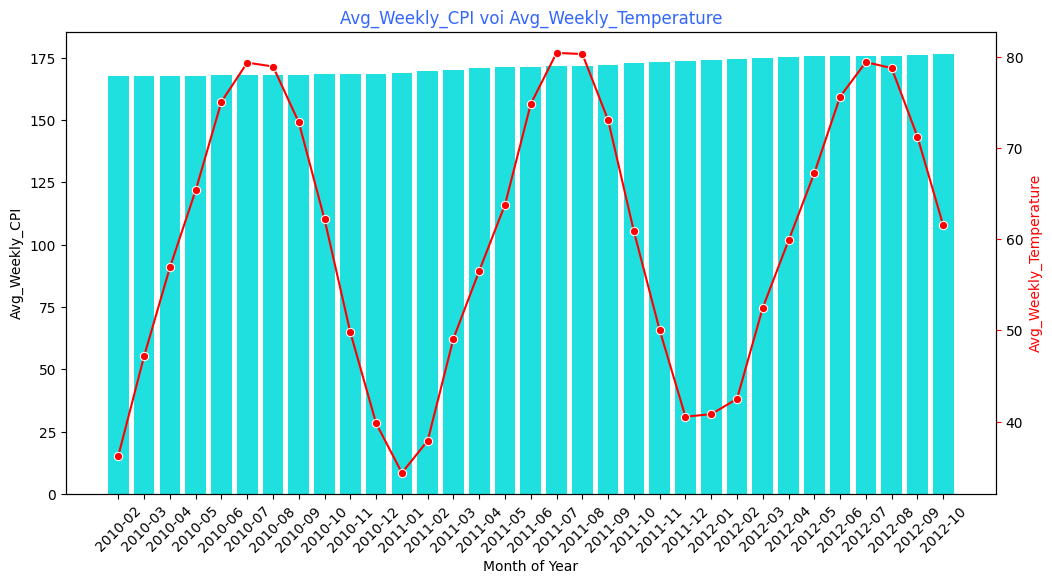

In [ ]:
figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_Month))

plt.xticks(x_axis, df_Month, rotation = 45)
sns.barplot(data=df_correlation, x=x_axis, y='CPI', color='#00FFFF', ax = axis)
ax2 = axis.twinx()
sns.lineplot(data=df_correlation, x=x_axis, y='Temperature', marker='o', color='red', ax = ax2)

axis.set_xlabel("Month of Year")
axis.set_ylabel("Avg_Weekly_CPI")
plt.title("Avg_Weekly_CPI voi Avg_Weekly_Temperature",color="#3366FF")

ax2.tick_params('y', color='r')
ax2.set_ylabel('Avg_Weekly_Temperature', color='r')
plt.show()

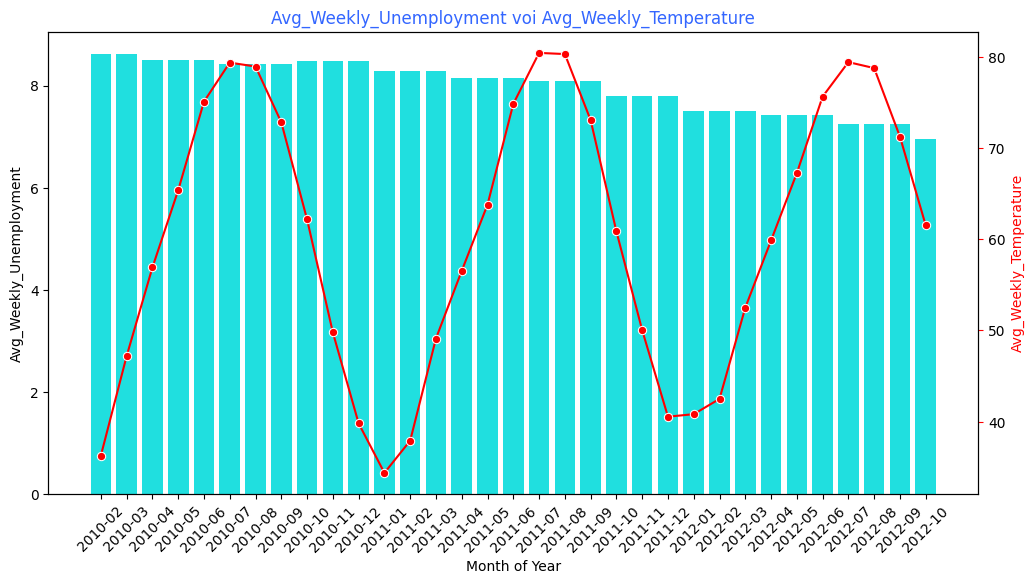

In [ ]:
figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_Month))

plt.xticks(x_axis, df_Month, rotation = 45)
sns.barplot(data=df_correlation, x=x_axis, y='Unemployment', color='#00FFFF', ax = axis)
ax2 = axis.twinx() 
sns.lineplot(data=df_correlation, x=x_axis, y='Temperature', marker='o', color='red', ax = ax2)

axis.set_xlabel("Month of Year")
axis.set_ylabel("Avg_Weekly_Unemployment")
plt.title("Avg_Weekly_Unemployment voi Avg_Weekly_Temperature",color="#3366FF")

ax2.tick_params('y', color='r')
ax2.set_ylabel('Avg_Weekly_Temperature', color='r')
plt.show()

<h1><font color = '#339966'>b.Phan tich doanh thu theo trung binh theo su tang/giam cac chi so Numeric<font></h1>


<ipython-input-272-c2cc2a8ea3cf>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_axis, y=df_11['Avg_Weekly_Sales'], data=df_11, palette='Set2', ax = axis)


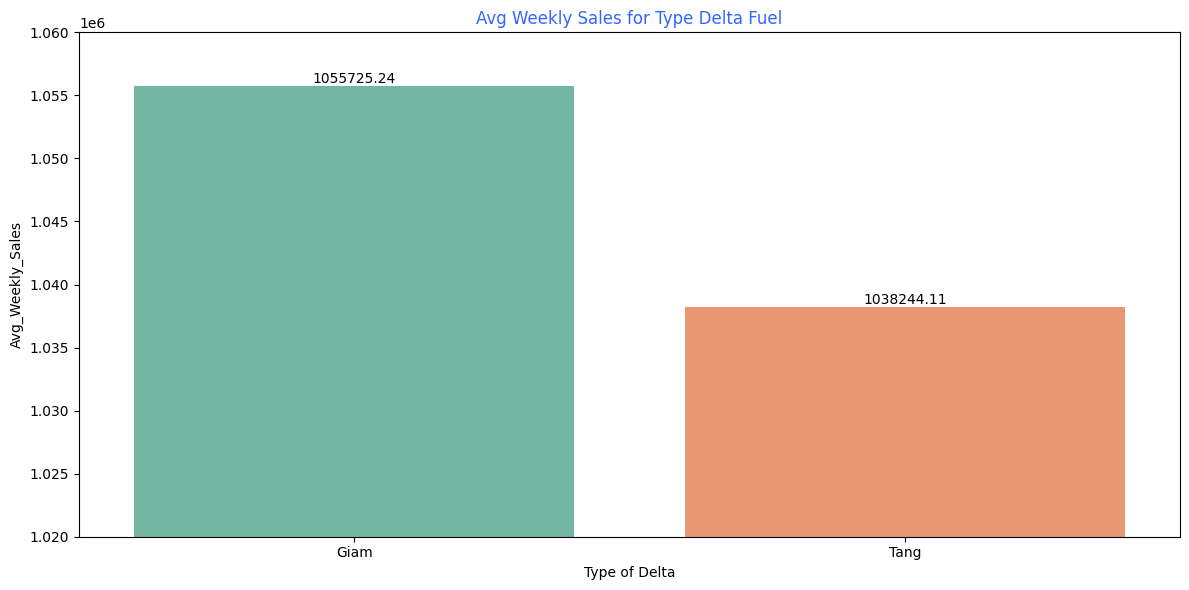

In [ ]:
#********
# Tinh delta gia nhien lieu va phan loaioai
# Lay doanh thu tuan dau tien lam tham chieu
# Voi datatype la object thi khong kiem tra tuong quan bang ham corr()
df['Delta_Fuel_Price'] = df['Fuel_Price'].diff()
types = []
for delta in df['Delta_Fuel_Price']:
  if delta < 0:
    types.append('Giam')
  elif delta > 0:
    types.append('Tang')
  else:
    types.append('Khong doi')
df['Delta_Fuel_Price'] = types
# Tao df giua loai delta gia nhien lieu voi trung binh doanh thu
df_11 = df.groupby('Delta_Fuel_Price').agg({'Weekly_Sales': 'mean'}).reset_index()
df_11 = df_11.round({'Weekly_Sales': 2})
df_11 = df_11[df_11['Delta_Fuel_Price'] != 'Khong doi']
df_11.rename(columns={'Weekly_Sales': 'Avg_Weekly_Sales'}, inplace=True)

figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_11['Delta_Fuel_Price']))

plt.xticks(x_axis, df_11['Delta_Fuel_Price'])
sns.barplot(x=x_axis, y=df_11['Avg_Weekly_Sales'], data=df_11, palette='Set2', ax = axis)

axis.set_ylim(1.02*1e6, 1.06*1e6)
axis.set_xlabel("Type of Delta")
axis.set_ylabel("Avg_Weekly_Sales")
plt.title("Avg Weekly Sales for Type Delta Fuel",color="#3366FF")

rects = axis.patches
# Make some labels.
labels = df_11['Avg_Weekly_Sales']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    axis.text(
        rect.get_x() + rect.get_width() / 2, height , label, ha="center", va="bottom"
    )

plt.tight_layout()
plt.show()




<h1><font color = '#3366FF'>Khi gia nhien lieu giam thi doanh thu trung binh theo tuan cao hon, muc do anh huong cung kha nhieu<font></h1>

<ipython-input-273-060fe5933550>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_axis, y=df_12['Avg_Weekly_Sales'], data=df_12, palette='Set2', ax = axis)


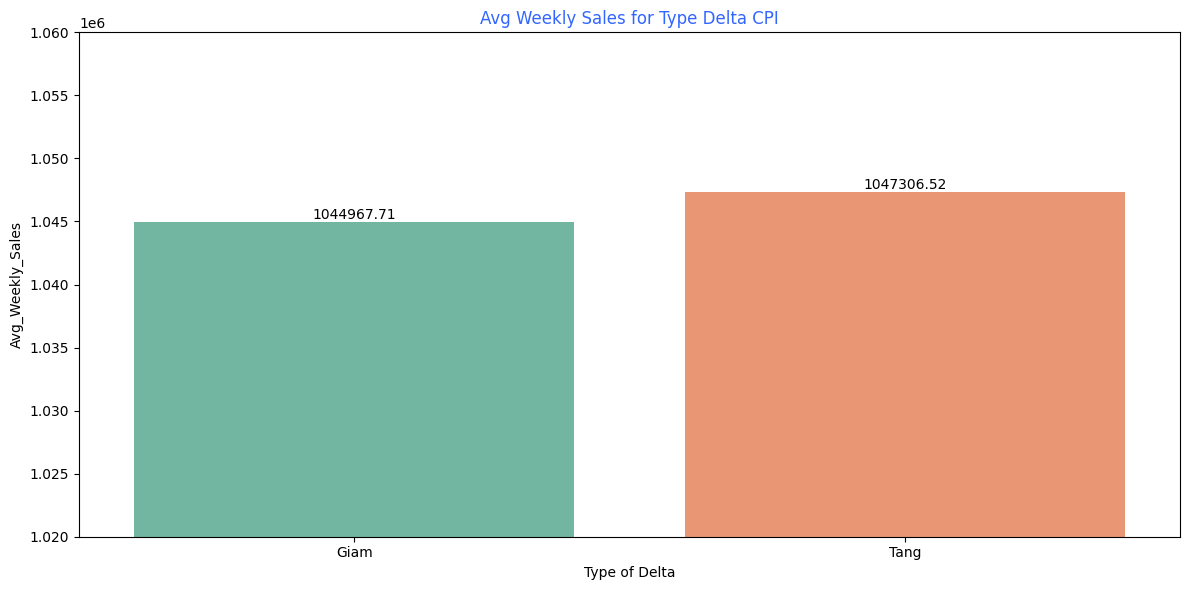

In [273]:
# Tinh delta chi so CPI va phan loại
df['Delta_CPI'] = df['CPI'].diff()
type1s = []
for delta in df['Delta_CPI']:
  if delta < 0:
    type1s.append('Giam')
  elif delta > 0:
    type1s.append('Tang')
  else:
    type1s.append('Khong doi')
df['Delta_CPI'] = type1s

df_12 = df.groupby('Delta_CPI').agg({'Weekly_Sales': 'mean'}).reset_index()
df_12 = df_12.round({'Weekly_Sales': 2})
df_12 = df_12[df_12['Delta_CPI'] != 'Khong doi']
df_12.rename(columns={'Weekly_Sales': 'Avg_Weekly_Sales'}, inplace=True)

figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_12['Delta_CPI']))

plt.xticks(x_axis, df_12['Delta_CPI'])

sns.barplot(x=x_axis, y=df_12['Avg_Weekly_Sales'], data=df_12, palette='Set2', ax = axis)

axis.set_ylim(1.02*1e6, 1.06*1e6)
axis.set_xlabel("Type of Delta")
axis.set_ylabel("Avg_Weekly_Sales")
plt.title("Avg Weekly Sales for Type Delta CPI",color="#3366FF")

rects = axis.patches
labels = df_12['Avg_Weekly_Sales']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    axis.text(
        rect.get_x() + rect.get_width() / 2, height , label, ha="center", va="bottom"
    )
plt.tight_layout()
plt.show()


<h1><font color = '#3366FF'>Doanh thu trung binh theo tuan tang khi chi so CPI tang nhung muc tang khong nhieu<font></h1>


<ipython-input-275-23266d74f04c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_axis, y=df_13['Avg_Weekly_Sales'], data=df_13, palette='Set2', ax = axis)


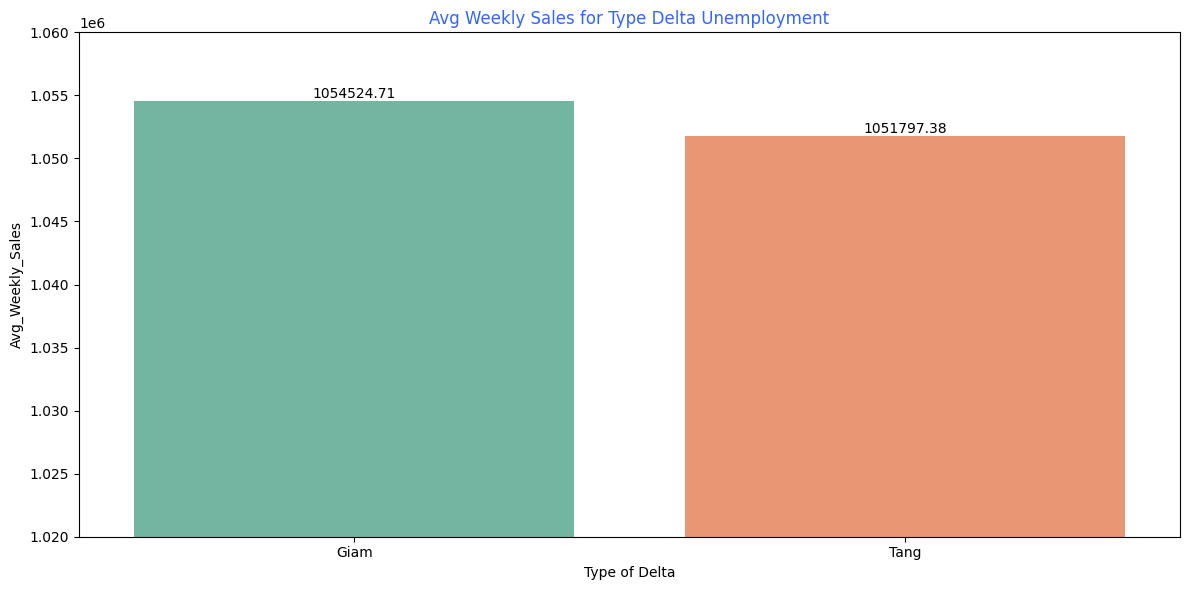

In [275]:
# Tinh delta chi so that nghiep va phan loai
# Lay doanh thu tuan dau tien lam tham chieu
df['Delta_Unemployment'] = df['Unemployment'].diff()
type2s = []
for delta in df['Delta_Unemployment']:
  if delta < 0:
    type2s.append('Giam')
  elif delta > 0:
    type2s.append('Tang')
  else:
    type2s.append('Khong doi')
df['Delta_Unemployment'] = type2s

df_13 = df.groupby('Delta_Unemployment').agg({'Weekly_Sales': 'mean'}).reset_index()
df_13 = df_13.round({'Weekly_Sales': 2})
df_13 = df_13[df_13['Delta_Unemployment'] != 'Khong doi']
df_13.rename(columns={'Weekly_Sales': 'Avg_Weekly_Sales'}, inplace=True)

figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_13['Delta_Unemployment']))
plt.xticks(x_axis, df_13['Delta_Unemployment'])

sns.barplot(x=x_axis, y=df_13['Avg_Weekly_Sales'], data=df_13, palette='Set2', ax = axis)

axis.set_ylim(1.02*1e6, 1.06*1e6)
axis.set_xlabel("Type of Delta")
axis.set_ylabel("Avg_Weekly_Sales")
plt.title("Avg Weekly Sales for Type Delta Unemployment",color="#3366FF")

rects = axis.patches
labels = df_13['Avg_Weekly_Sales']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    axis.text(
        rect.get_x() + rect.get_width() / 2, height , label, ha="center", va="bottom"
    )
plt.tight_layout()
plt.show()


<h1><font color = '#3366FF'>Doanh thu trung binh theo tuan tang khi chi so Unemployment giam, nhung cung khong anh huong nhieu<font></h1>



<ipython-input-276-05acbfc1b335>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_axis, y=df_14['Avg_Weekly_Sales'], data=df_14, palette='Set2', ax = axis)


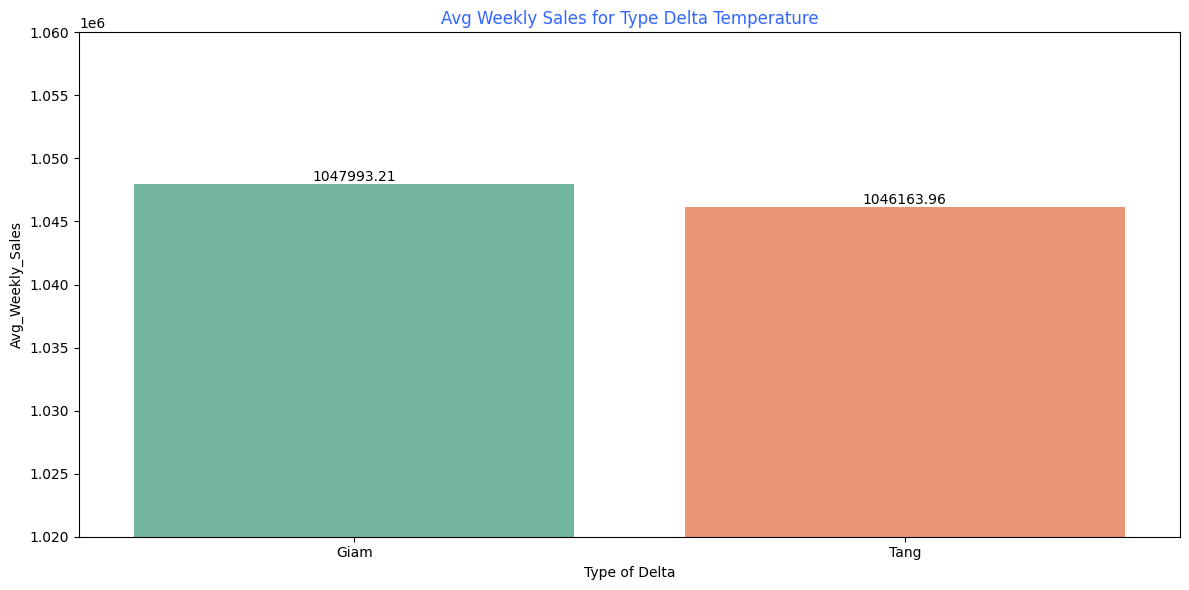

In [276]:
# Tinh delta nhiet do trung binh va phan loại
# Lay doanh thu tuan dau tien lam tham chieu
df['Delta_Temperature'] = df['Temperature'].diff()
type3s = []
for delta in df['Delta_Temperature']:
  if delta < 0:
    type3s.append('Giam')
  elif delta > 0:
    type3s.append('Tang')
  else:
    type3s.append('Khong doi')
df['Delta_Temperature'] = type3s

df_14 = df.groupby('Delta_Temperature').agg({'Weekly_Sales': 'mean'}).reset_index()
df_14 = df_14.round({'Weekly_Sales': 2})
df_14 = df_14[df_14['Delta_Temperature'] != 'Khong doi']
df_14.rename(columns={'Weekly_Sales': 'Avg_Weekly_Sales'}, inplace=True)

figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_14['Delta_Temperature']))
plt.xticks(x_axis, df_14['Delta_Temperature'])

sns.barplot(x=x_axis, y=df_14['Avg_Weekly_Sales'], data=df_14, palette='Set2', ax = axis)

axis.set_ylim(1.02*1e6, 1.06*1e6)
axis.set_xlabel("Type of Delta")
axis.set_ylabel("Avg_Weekly_Sales")
plt.title("Avg Weekly Sales for Type Delta Temperature",color="#3366FF")

rects = axis.patches
labels = df_14['Avg_Weekly_Sales']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    axis.text(
        rect.get_x() + rect.get_width() / 2, height , label, ha="center", va="bottom"
    )
plt.tight_layout()
plt.show()


<h1><font color = '#3366FF'>Khi nhiet do thay doi khong anh huong nhieu toi doanh thu trung binh theo tuan<font></h1>


<h1><font color = '#339966'>c.Phan tich doanh thu trung binh voi cac yeu to Category<font></h1>

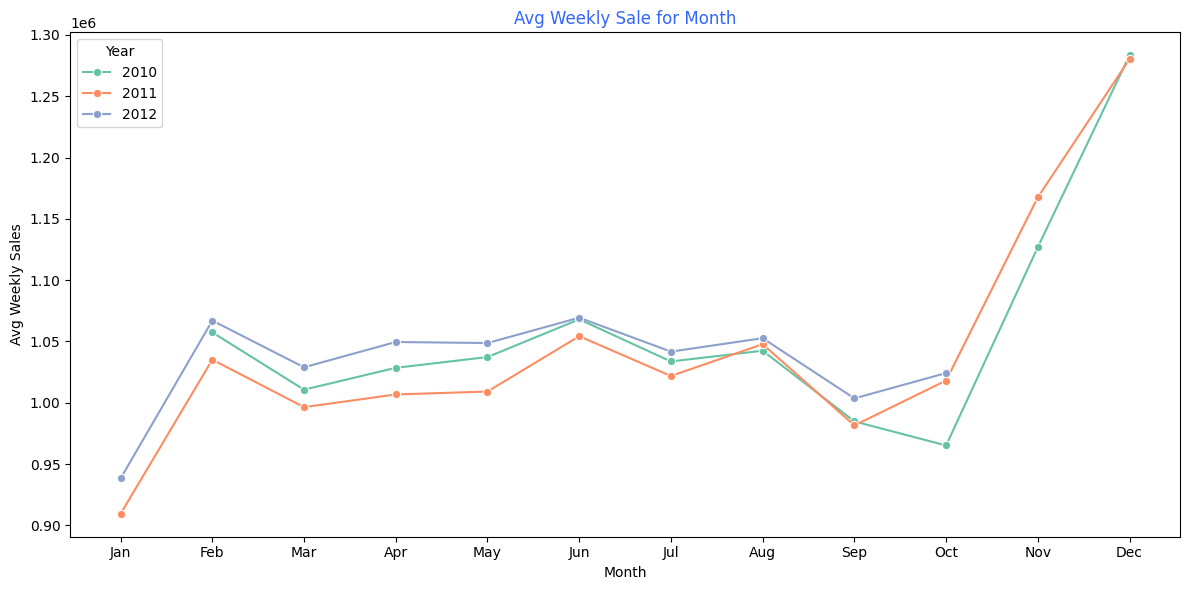

In [ ]:
df_avg_sales = df.groupby(['Month','Year']).agg({'Weekly_Sales': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_avg_sales, x='Month', y='Weekly_Sales',hue='Year', marker='o', palette='Set2')

plt.xlabel('Month')
plt.ylabel('Avg Weekly Sales') 
plt.title('Avg Weekly Sale for Month',color="#3366FF")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()



<h1><font color = '#3366FF'>Doanh thu trung binh cac nam tuong doi deu, tang manh vao thang cuoi nam<font></h1>


<ipython-input-302-4518bab834fb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sale_for_holiday = df.groupby(['Holiday_Flag']).agg({'Weekly_Sales': 'mean'}).reset_index()


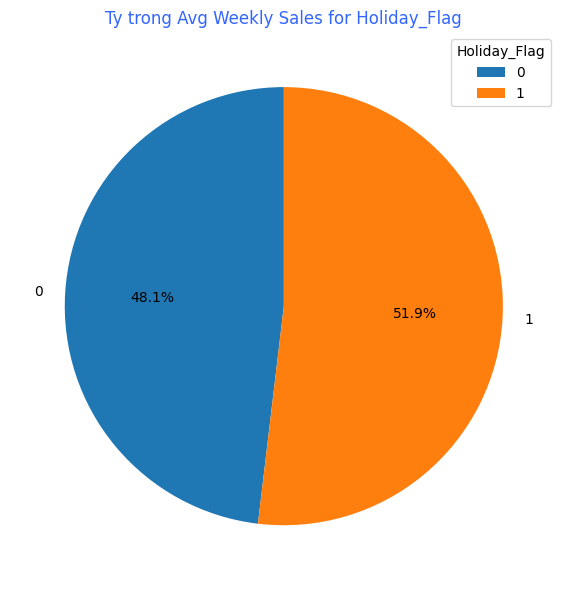

In [302]:
# Tao df
df_sale_for_holiday = df.groupby(['Holiday_Flag']).agg({'Weekly_Sales': 'mean'}).reset_index()
df_sale_for_holiday.rename(columns={'Weekly_Sales': 'Avg_Weekly_Sales'}, inplace=True)
df_sale_for_holiday = df_sale_for_holiday.round({'Avg_Weekly_Sales': 2})
df_sale_for_holiday = df_sale_for_holiday.fillna(0)

# Ve bieu do
labels = df_sale_for_holiday['Holiday_Flag']
sizes = df_sale_for_holiday['Avg_Weekly_Sales']

fig, ax = plt.subplots(figsize=(6, 6))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Title cua bieu do and name axis
plt.title('Ty trong Avg Weekly Sales for Holiday_Flag',color="#3366FF")
plt.legend(title='Holiday_Flag')
plt.tight_layout()
plt.show()



<h1><font color = '#3366FF'>Doanh thu trung binh cua cac tuan co ngay le cao hon tuan chi co ngay ngay thuong<font></h1>


<ipython-input-280-c02ebceaefed>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sale_holiday = df.groupby(['Year','Holiday_Flag']).agg({'Weekly_Sales': 'mean'}).reset_index()


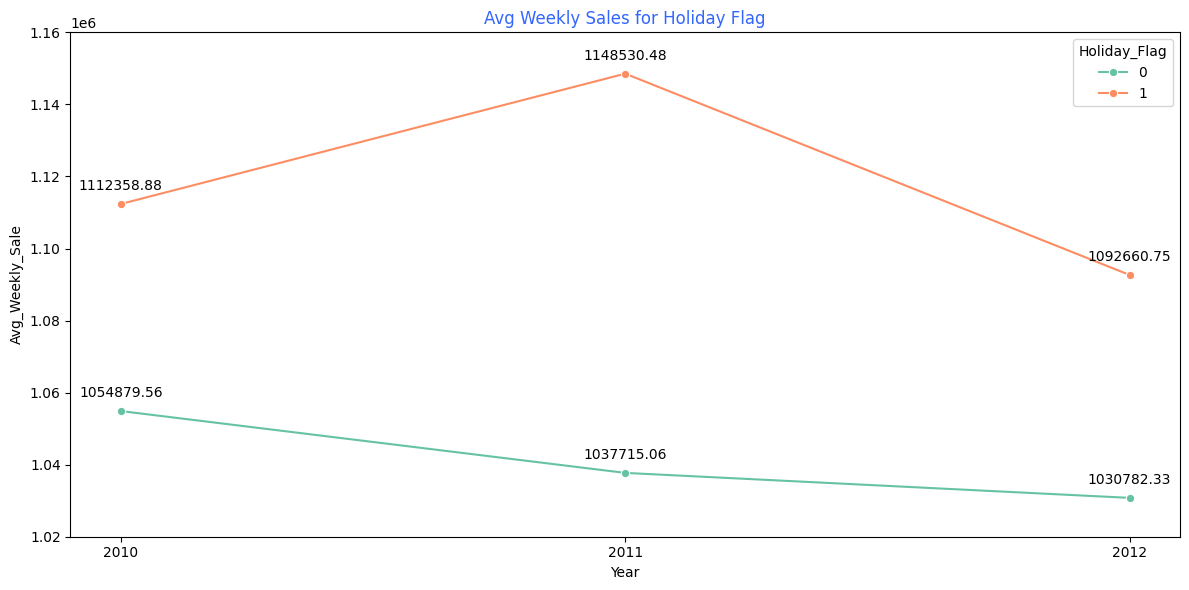

In [ ]:
# Tao df
df_sale_holiday = df.groupby(['Year','Holiday_Flag']).agg({'Weekly_Sales': 'mean'}).reset_index()
df_sale_holiday.rename(columns={'Weekly_Sales': 'Avg_Weekly_Sale'}, inplace=True)
df_sale_holiday = df_sale_holiday.round({'Avg_Weekly_Sale': 2})
df_sale_holiday = df_sale_holiday.fillna(0)

figure, axis = plt.subplots(figsize=(12, 6))
sns.lineplot(x='Year', y='Avg_Weekly_Sale', hue='Holiday_Flag', data=df_sale_holiday, palette='Set2', marker='o', color='red')

axis.set_xticks(range(2010,2013,1))
axis.set_ylim(1.02*1e6, 1.16*1e6)
axis.set_xlabel("Year")
axis.set_ylabel("Avg_Weekly_Sale")
plt.title("Avg Weekly Sales for Holiday Flag",color="#3366FF")

for x,y in zip(df_sale_holiday['Year'], df_sale_holiday['Avg_Weekly_Sale']):
    label = "{:.2f}".format(y)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
plt.tight_layout()
plt.show()



<h1><font color = '#3366FF'>Doanh thu trung binh cua cac tuan co ngay le cung cao hon tuan binh thuong o cac nam, vao nam 2011 thi chenh lech tang kha nhieu<font></h1>


<ipython-input-35-91ee34efadbe>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sale_for_store = df.groupby(['Store']).agg({'Weekly_Sales': 'mean'}).reset_index()
<ipython-input-35-91ee34efadbe>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sale_for_store_max, x=x_axis, y='Avg_Sales', palette="blend:#7AB,#EDA", ax = axis)


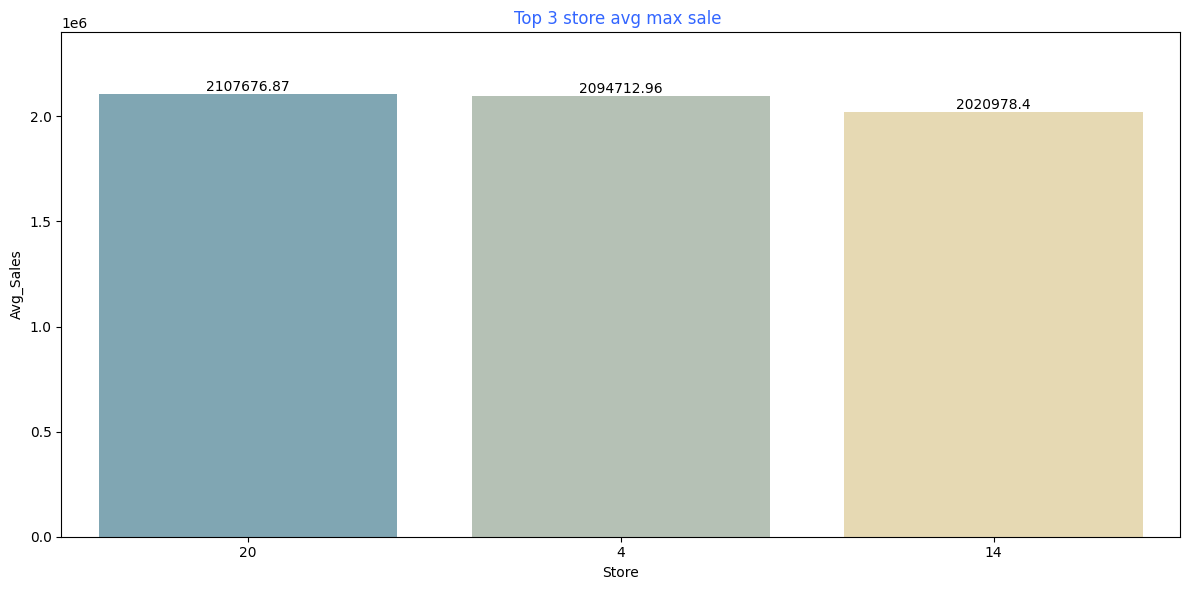

In [ ]:
# Tong doanh so theo store
# Bieu do the hien thong tin top 5 store co daonh thu cao nhat
df_sale_for_store = df.groupby(['Store']).agg({'Weekly_Sales': 'mean'}).reset_index()
df_sale_for_store.rename(columns={'Weekly_Sales': 'Avg_Sales'}, inplace=True)
df_sale_for_store = df_sale_for_store.round({'Avg_Sales': 2})
df_sale_for_store.sort_values(by='Avg_Sales', ascending=False, inplace=True)
df_sale_for_store_max = df_sale_for_store.head(3)

figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_sale_for_store_max['Store']))
plt.xticks(x_axis, df_sale_for_store_max['Store'])

sns.barplot(data=df_sale_for_store_max, x=x_axis, y='Avg_Sales', palette="blend:#7AB,#EDA", ax = axis)

axis.set_ylim(0, 2.4*1e6)
axis.set_xlabel("Store")
axis.set_ylabel("Avg_Sales")
plt.title("Top 3 store avg max sale ",color="#3366FF")

rects = axis.patches
labels = df_sale_for_store_max['Avg_Sales']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    axis.text(
        rect.get_x() + rect.get_width() / 2, height , label, ha="center", va="bottom"
    )
plt.tight_layout()
plt.show()



<h1><font color = '#3366FF'>Top 3 cua hang co doanh thu trung binh cao nhat<font></h1>


<ipython-input-36-4ac62974e0e4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_axis, y=df_sale_for_store_min['Avg_Sales'], data=df_sale_for_store_min, palette="blend:#7AB,#EDA", ax = axis)


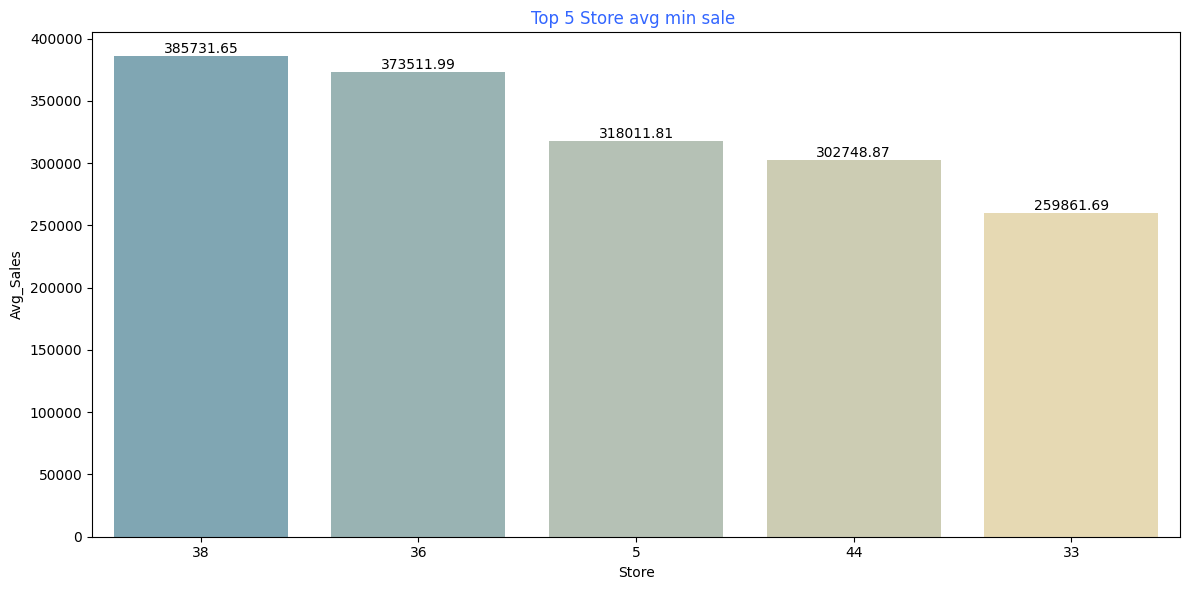

In [ ]:
# Bieu do the hien top 5 cua hang co doanh thu thap nhat
df_sale_for_store_min = df_sale_for_store.tail(5)

figure, axis = plt.subplots(figsize=(12, 6))
x_axis = np.arange(len(df_sale_for_store_min['Store']))
plt.xticks(x_axis, df_sale_for_store_min['Store'])

sns.barplot(x=x_axis, y=df_sale_for_store_min['Avg_Sales'], data=df_sale_for_store_min, palette="blend:#7AB,#EDA", ax = axis)

axis.set_xlabel("Store")
axis.set_ylabel("Avg_Sales")
plt.title("Top 5 Store avg min sale ",color="#3366FF")

rects = axis.patches
labels = df_sale_for_store_min['Avg_Sales']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    axis.text(
        rect.get_x() + rect.get_width() / 2, height , label, ha="center", va="bottom"
    )
plt.tight_layout()
plt.show()



<h1><font color = '#3366FF'>Top 5 cua hang co doanh thu trung binh thap nhat<font></h1>


<ipython-input-37-5cd1c0314e1e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sale_for_store = df.groupby(['Store','Holiday_Flag']).agg({'Weekly_Sales': 'mean'}).reset_index()


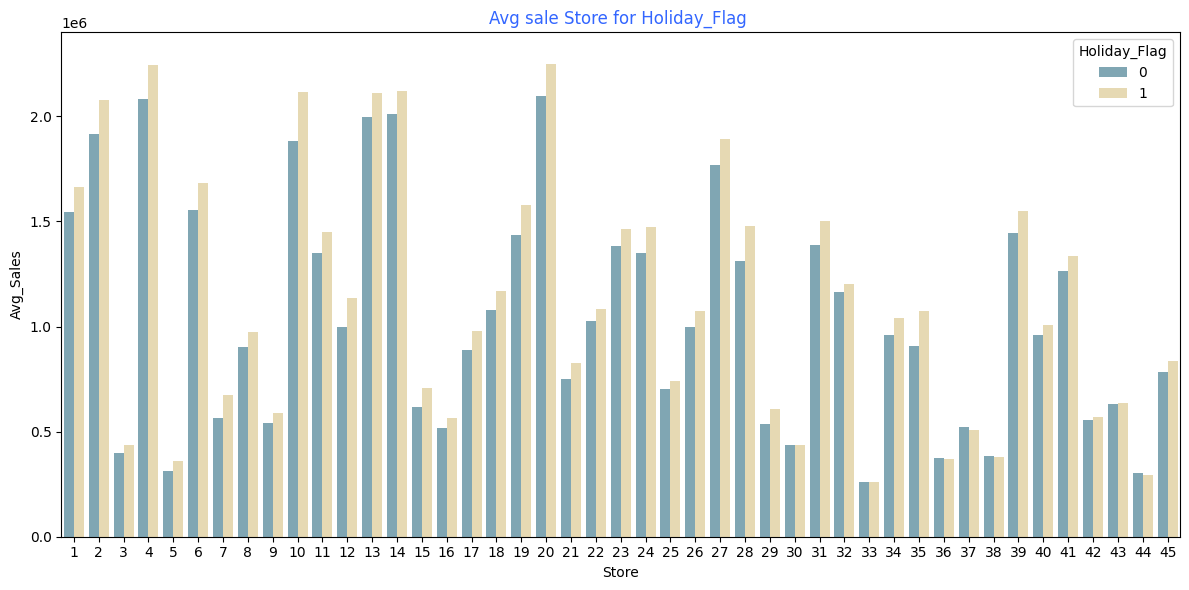

In [ ]:
df_sale_for_store = df.groupby(['Store','Holiday_Flag']).agg({'Weekly_Sales': 'mean'}).reset_index()
df_sale_for_store.rename(columns={'Weekly_Sales': 'Avg_Sales'}, inplace=True)
df_sale_for_store = df_sale_for_store.round({'Avg_Sales': 2})
df_sale_for_store.sort_values(by='Avg_Sales', ascending=False, inplace=True)

figure, axis = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_sale_for_store, x='Store', y='Avg_Sales', hue='Holiday_Flag', palette="blend:#7AB,#EDA", ax = axis)

axis.set_ylim(0, 2.4*1e6)
axis.set_xlabel("Store")
axis.set_ylabel("Avg_Sales")
plt.title("Avg sale Store for Holiday_Flag ",color="#3366FF")

plt.tight_layout()
plt.show()


<h1><font color = '#3366FF'>Hau het cac cua hang co doanh thu trung binh cao hon vao cac tuan co ngay le, nhung o cac cua hang so 30,33,36,37,38,44 thi doanh thu trung binh cua tuan co ngay le chi bang hoac thap hon<font></h1>
